In [2]:
# 라이브러리 및 모듈 호출
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

In [29]:
# 시드고정
seed=42
np.random.seed(seed)
tf.random.set_seed(seed)

In [30]:
# 데이터 불러오기
(X_train,Y_train),(X_test,Y_test) = reuters.load_data(num_words=1000, # 빈도수가 1~1000순위에 해당하는 단어만 가져옴
                                                      test_split=0.2)

In [31]:
# 데이터 확인
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [32]:
# 데이터 전처리
maxlen = 100
X_train = sequence.pad_sequences(X_train, maxlen=maxlen) # 각 기사를 단어100개로 패딩
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
Y_train = np_utils.to_categorical(Y_train) # 각 카테고리를 원핫인코딩
Y_test = np_utils.to_categorical(Y_test)

In [38]:
# 왜 패딩을 100개로 했는지 확인해봄
b=0
for i in range(len(X_train)):
    if len(X_train[i]) > b :
        b=len(X_train[i])
print(b)    

100


In [33]:
# 모델 생성
model = Sequential()
model.add(Embedding(1000,maxlen)) # 처음 불러온 단어의 총 개수(빈도수 1000위까지 가져왔음), 패딩 결과의 수
model.add(LSTM(maxlen, activation='tanh'))
model.add(Dense(category, activation='softmax'))

In [34]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
# 모델 학습
history = model.fit(X_train, Y_train, batch_size=100, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
90/90 [==============================] - 4s 21ms/step - loss: 2.5334 - accuracy: 0.3889 - val_loss: 2.0804 - val_accuracy: 0.4987
Epoch 2/20
90/90 [==============================] - 1s 16ms/step - loss: 2.0365 - accuracy: 0.5018 - val_loss: 2.0251 - val_accuracy: 0.5013
Epoch 3/20
90/90 [==============================] - 1s 15ms/step - loss: 1.9959 - accuracy: 0.5037 - val_loss: 1.8346 - val_accuracy: 0.5316
Epoch 4/20
90/90 [==============================] - 1s 15ms/step - loss: 1.7334 - accuracy: 0.5571 - val_loss: 1.7003 - val_accuracy: 0.5739
Epoch 5/20
90/90 [==============================] - 1s 15ms/step - loss: 1.6388 - accuracy: 0.5799 - val_loss: 1.6300 - val_accuracy: 0.5993
Epoch 6/20
90/90 [==============================] - 1s 15ms/step - loss: 1.5330 - accuracy: 0.6088 - val_loss: 1.6309 - val_accuracy: 0.5922
Epoch 7/20
90/90 [==============================] - 1s 16ms/step - loss: 1.4526 - accuracy: 0.6332 - val_loss: 1.5194 - val_accuracy: 0.6167
Epoch 8/20
90

In [36]:
# 결과 출력
print(f'Test Accuracy: {model.evaluate(X_test, Y_test)[1]:.4f}')

71/71 [==============================] - 0s 6ms/step - loss: 1.2428 - accuracy: 0.7039
Test Accuracy: 0.7039


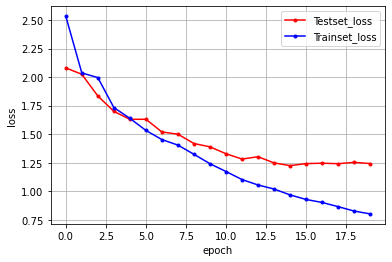

In [37]:
# 시각화를 통해 loss 확인하기
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc=0)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()